In [1]:
import pandas as pd
#import os
from matplotlib import pyplot as plt

#os.chdir('C:/Mark/Statistics Masters/Courses/Fall 2020/Advanced Machine Learning/Project/holdem-agent/experiments/')

In [32]:
max_time = 400e3

results = pd.read_csv('../experiments/all_performance.csv')

results_NFSP = results[['timestep1', 'NFSP']].dropna()
results_NFSP = results_NFSP[results_NFSP['timestep1']< max_time]

results_DQN = results[['timestep2', 'DQN']].dropna()
results_DQN = results_DQN[results_DQN['timestep2']<max_time]

results_PPO = results[['timestep3', 'PPO - 1stepAdv']].dropna().iloc[::10,:]
results_PPO = results_PPO[results_PPO['timestep3']<max_time]

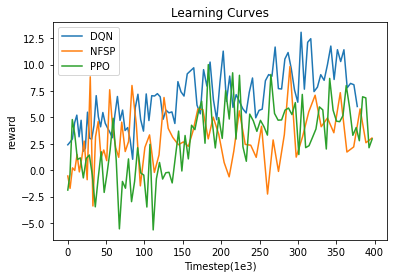

In [38]:
line1,  = plt.plot(results_DQN['timestep2']/1000, results_DQN['DQN'])
line2,  = plt.plot(results_NFSP['timestep1']/1000, results_NFSP['NFSP'])
line3, = plt.plot(results_PPO['timestep3']/1000, results_PPO['PPO - 1stepAdv'])
plt.xlabel('Timestep(1e3)')
plt.ylabel('reward')
plt.title('Learning Curves')
plt.legend((line1, line2, line3), ('DQN', 'NFSP', 'PPO'))
#plt.show()

plt.savefig('learning_curves.png')

In [44]:
import numpy as np

In [63]:
# Interpolate results and then apply moving average
times = np.linspace(0,400000, 20)
vals_DQN = np.interp(times, results_DQN['timestep2'], results_DQN['DQN'])
vals_NFSP = np.interp(times, results_NFSP['timestep1'], results_NFSP['NFSP'])
vals_PPO = np.interp(times, results_PPO['timestep3'], results_PPO['PPO - 1stepAdv'])

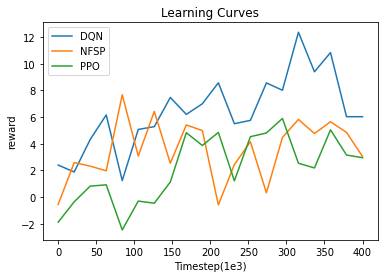

In [67]:
line1,  = plt.plot(times/1000, vals_DQN)
line2,  = plt.plot(times/1000, vals_NFSP)
line3, = plt.plot(times/1000, vals_PPO)
plt.xlabel('Timestep(1e3)')
plt.ylabel('reward')
plt.title('Learning Curves')
plt.legend((line1, line2, line3), ('DQN', 'NFSP', 'PPO'))
#plt.show()
#plt.show()
plt.savefig('learning_curves.png')

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w